In [21]:
# For data analysis
import pandas as pd

# For model creation and performance evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

# For visualizations and interactive dashboard creation
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# load data
data = pd.read_csv("data/winequality-red.csv")

In [3]:
# check fo`r missing values
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [4]:
# drop rows with missing values
data.dropna(inplace=True)

In [5]:
# Drop duplicate rows
data.drop_duplicates(keep='first')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


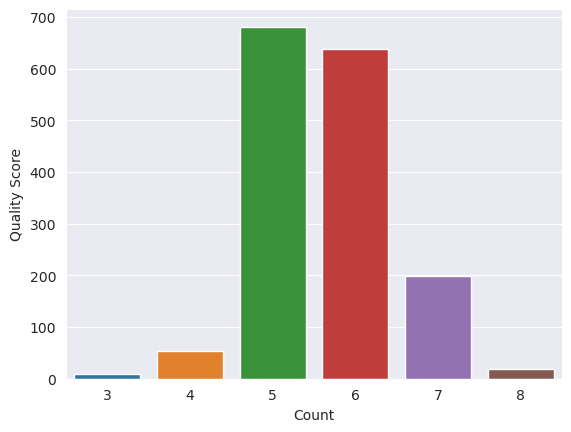

In [6]:
# Check wine quality distribution
plt.figure(dpi=100)
sns.countplot(data=data, x="quality")
plt.xlabel("Count")
plt.ylabel("Quality Score")
plt.show()

In [7]:
# Label quality into Good(1) and Bad(0)
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6.0 else 0)

In [8]:
data['quality']

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

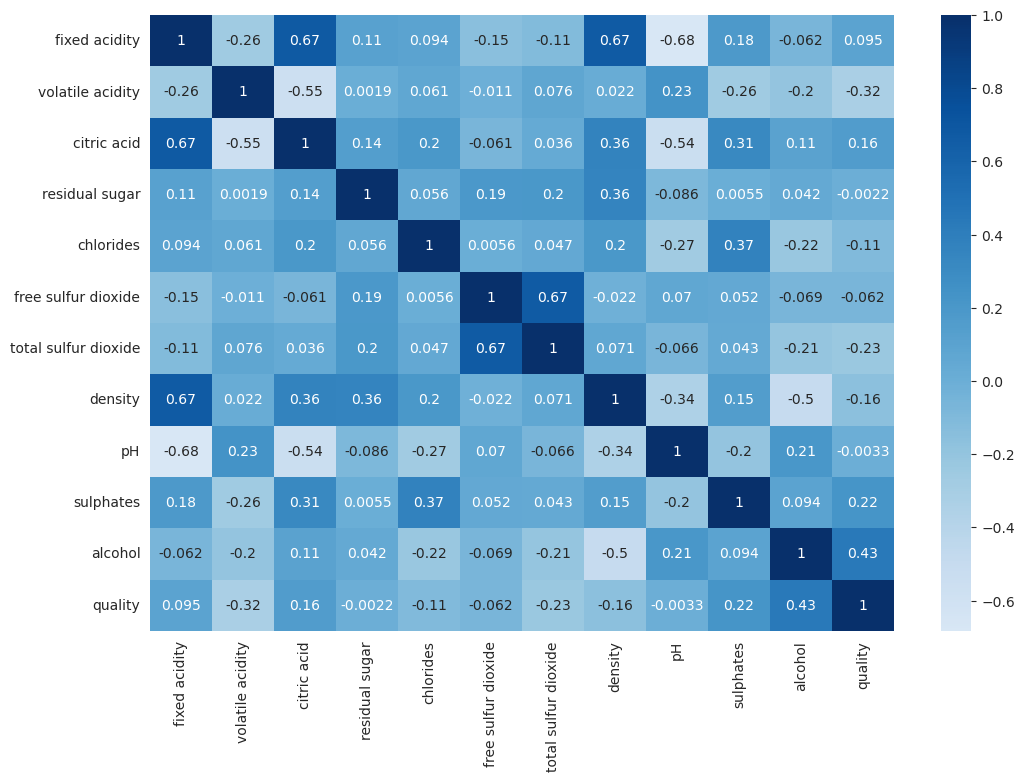

In [9]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8), dpi=100)

sns.heatmap(corr_matrix, center=0, cmap='Blues', annot=True)
plt.show()

In [10]:
# Drop the target variable
X = data.drop('quality', axis=1)

# set the target variable as label
y = data['quality']

In [11]:
scaler = StandardScaler()

# Split the data into training and testing sets (20% testing and 80% training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
# Create an object of the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)

In [13]:
# Fit the model to the training data
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
# Predict the labels of the test set
y_pred = logreg_model.predict(X_test)

In [15]:
# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

In [25]:
# compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# compute the precision  of the model
precision = precision_score(y_test, y_pred)

# compute the recall of the model
recall = recall_score(y_test, y_pred)

# compute the F1 score of the model
f1 = f1_score(y_test, y_pred)

In [29]:
print("Accuracy : ", accuracy)

Accuracy :  0.7573529411764706


In [30]:
print("Precision : ", precision)

Precision :  0.7553956834532374


In [31]:
print("Recall : ", recall)

Recall :  0.7664233576642335


In [32]:
print("F1 Score : ", f1)

F1 Score :  0.7608695652173912


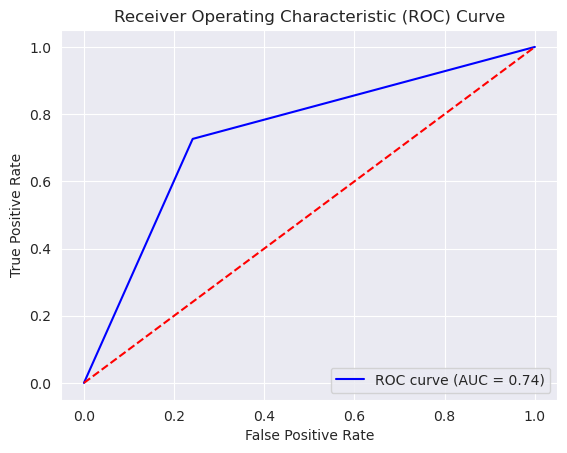

In [17]:
# y_true and y_score are the true labels and predicted scores, respectively
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

plt.figure(dpi=100)
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [23]:
# # Create the Dash app
# app = dash.Dash(__name__)
#
# # Define the layout of the dashboard
# app.layout = html.Div(
#     children=[
#         html.H1('CO544-2023 Lab 3: Wine Quality Prediction'),
#
#         # Layout for exploratory data analysis: correlation between two selected features
#         html.Div([
#             html.H3('Exploratory Data Analysis'),
#             html.Label('Feature 1 (X-axis)'),
#             dcc.Dropdown(
#                 id='x_feature',
#                 options=[{'label': col, 'value': col} for col in data.columns],
#                 value=data.columns[0]
#             )
#         ], style={'width': '30%', 'display': 'inline-block'}),
#
#         html.Div([
#             html.Label('Feature 2 (Y-axis)'),
#             dcc.Dropdown(
#                 id='y_feature',
#                 options=[{'label': col, 'value': col} for col in data.columns],
#                 value=data.columns[1]
#             )
#         ], style={'width': '30%', 'display': 'inline-block'}),
#
#         dcc.Graph(id='correlation_plot'),
#
#         # Layout for wine quality prediction based on input feature values
#         html.H3("Wine Quality Prediction"),
#
#         html.Div([
#             html.Label("Fixed Acidity"),
#             dcc.Input(id='fixed_acidity', type='number', required=True),
#             html.Label("Volatile Acidity"),
#             dcc.Input(id='volatile_acidity', type='number', required=True),
#             html.Label("Citric Acid"),
#             dcc.Input(id='citric_acid', type='number', required=True),
#             html.Br(),
#             html.Label("Residual Sugar"),
#             dcc.Input(id='residual_sugar', type='number', required=True),
#             html.Label("Chlorides"),
#             dcc.Input(id='chlorides', type='number', required=True),
#             html.Label("Free Sulfur Dioxide"),
#             dcc.Input(id='free_sulfur_dioxide', type='number', required=True),
#             html.Br(),
#             html.Label("Total Sulfur Dioxide"),
#             dcc.Input(id='total_sulfur_dioxide', type='number', required=True),
#             html.Label("Density"),
#             dcc.Input(id='density', type='number', required=True),
#             html.Label("pH"),
#             dcc.Input(id='ph', type='number', required=True),
#             html.Br(),
#             html.Label("Sulphates"),
#             dcc.Input(id='sulphates', type='number', required=True),
#             html.Label("Alcohol"),
#             dcc.Input(id='alcohol', type='number', required=True),
#             html.Br(),
#         ]),
#
#         html.Div([
#             html.Button('Predict', id='predict-button', n_clicks=0),
#         ]),
#
#         html.Div([
#             html.H4("Predicted Quality"),
#             html.Div(id='prediction-output')
#         ])
#     ]
# )

In [24]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
)

# Load data
data = pd.read_csv("data/winequality-red.csv")

# Drop rows with missing values
data.dropna(inplace=True)

# Drop duplicate rows
data.drop_duplicates(keep='first', inplace=True)

# Label quality into Good(1) and Bad(0)
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6.0 else 0)

# Drop the target variable
X = data.drop('quality', axis=1)

# Set the target variable as label
y = data['quality']

scaler = StandardScaler()

# Split the data into training and testing sets (20% testing and 80% training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create an object of the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = logreg_model.predict(X_test)

# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Compute the precision of the model
precision = precision_score(y_test, y_pred)

# Compute the recall of the model
recall = recall_score(y_test, y_pred)

# Compute the F1 score of the model
f1 = f1_score(y_test, y_pred)

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

# Create the Dash app
app = dash.Dash(__name__)

# Add CSS styles
app.css.append_css({
    'external_url': 'https://cdnjs.cloudflare.com/ajax/libs/skeleton/2.0.4/skeleton.min.css'
})

# Define available parameter options for comparison dropdowns
param_options = [
    {'label': 'Fixed Acidity', 'value': 'fixed acidity'},
    {'label': 'Volatile Acidity', 'value': 'volatile acidity'},
    {'label': 'Citric Acid', 'value': 'citric acid'},
    {'label': 'Residual Sugar', 'value': 'residual sugar'},
    {'label': 'Chlorides', 'value': 'chlorides'},
    {'label': 'Free Sulfur Dioxide', 'value': 'free sulfur dioxide'},
    {'label': 'Total Sulfur Dioxide', 'value': 'total sulfur dioxide'},
    {'label': 'Density', 'value': 'density'},
    {'label': 'pH', 'value': 'pH'},
    {'label': 'Sulphates', 'value': 'sulphates'},
    {'label': 'Alcohol', 'value': 'alcohol'}
]

# Define the layout of the dashboard
app.layout = html.Div(
    className='container',
    children=[
        html.H1('Wine Quality Prediction Dashboard', style={'text-align': 'center'}),

        html.H2('Model Evaluation Metrics'),

        html.Div(
            className='row',
            children=[
                html.Div(
                    className='six columns',
                    children=[
                        html.H3('Confusion Matrix'),
                        html.Table(
                            className='u-full-width',
                            children=[
                                html.Tr(children=[
                                    html.Th(''),
                                    html.Th('Predicted 0'),
                                    html.Th('Predicted 1'),
                                ]),
                                html.Tr(children=[
                                    html.Th('Actual 0'),
                                    html.Td(f'True Negative: {confusion_mat[0, 0]}'),
                                    html.Td(f'False Positive: {confusion_mat[0, 1]}'),
                                ]),
                                html.Tr(children=[
                                    html.Th('Actual 1'),
                                    html.Td(f'False Negative: {confusion_mat[1, 0]}'),
                                    html.Td(f'True Positive: {confusion_mat[1, 1]}'),
                                ]),
                            ],
                            style={'margin': '20px'}
                        ),
                    ]
                ),
                html.Div(
                    className='six columns',
                    children=[
                        html.H3('Model Performance Metrics'),
                        html.Table(
                            className='u-full-width',
                            children=[
                                html.Tr(children=[
                                    html.Th('Accuracy'),
                                    html.Td(f'{accuracy:.2f}'),
                                ]),
                                html.Tr(children=[
                                    html.Th('Precision'),
                                    html.Td(f'{precision:.2f}'),
                                ]),
                                html.Tr(children=[
                                    html.Th('Recall'),
                                    html.Td(f'{recall:.2f}'),
                                ]),
                                html.Tr(children=[
                                    html.Th('F1 Score'),
                                    html.Td(f'{f1:.2f}'),
                                ]),
                                html.Tr(children=[
                                    html.Th('AUC Score'),
                                    html.Td(f'{auc_score:.2f}'),
                                ]),
                            ],
                            style={'margin': '20px'}
                        ),
                    ]
                ),
            ]
        ),

        html.H2('Receiver Operating Characteristic (ROC) Curve'),

        html.Div(
            className='row',
            children=[
                html.Div(
                    className='six columns',
                    children=[
                        html.H4('ROC Curve'),
                        dcc.Graph(
                            id='roc-curve',
                            figure={
                                'data': [
                                    {'x': fpr, 'y': tpr, 'type': 'line', 'name': 'ROC curve'},
                                    {'x': [0, 1], 'y': [0, 1], 'type': 'line', 'name': 'Random'},
                                ],
                                'layout': {
                                    'title': 'Receiver Operating Characteristic (ROC) Curve',
                                    'xaxis': {'title': 'False Positive Rate'},
                                    'yaxis': {'title': 'True Positive Rate'},
                                    'margin': {'t': 30, 'b': 30, 'l': 30, 'r': 30},
                                }
                            }
                        ),
                    ]
                ),
                html.Div(
                    className='six columns',
                    children=[
                        html.H4('Compare Parameter Effects'),
                        dcc.Dropdown(
                            id='x-param-dropdown',
                            options=param_options,
                            value='fixed acidity',
                            clearable=False
                        ),
                        dcc.Dropdown(
                            id='y-param-dropdown',
                            options=param_options,
                            value='volatile acidity',
                            clearable=False
                        ),
                        dcc.Graph(
                            id='param-effects',
                        ),
                    ]
                ),
            ]
        ),
    ]
)


# Callback function to update the parameter effects graph based on dropdown selections
@app.callback(
    Output('param-effects', 'figure'),
    Input('x-param-dropdown', 'value'),
    Input('y-param-dropdown', 'value')
)
def update_param_effects(x_param, y_param):
    fig = px.scatter(
        data,
        x=x_param,
        y=y_param,
        color='quality',
        title=f'Effect of {x_param.capitalize()} and {y_param.capitalize()} on Wine Quality',
        labels={'quality': 'Wine Quality'},
        hover_name='quality',
        hover_data={'quality': True}
    )
    return fig


# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: on


Traceback (most recent call last):
  File "/home/gimhara/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/gimhara/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/traitlets/config/application.py", line 991, in launch_instance
    app.initialize(argv)
  File "/home/gimhara/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/traitlets/config/application.py", line 113, in inner
    return method(app, *args, **kwargs)
  File "/home/gimhara/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 666, in initialize
    self.init_sockets()
  File "/home/gimhara/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 307, in init_sockets
    self.shell_port = self._bind_socket(self.shell_socket, self.shell_port)
  File "/home/gimhara/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 244, in _bind_soc

SystemExit: 1

/home/gimhara/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
